In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib

C:\Users\conta\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\conta\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\conta\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("hiring.csv")

In [3]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
data.experience=data.experience.fillna("zero")

In [5]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [6]:
score_mean=data["test_score(out of 10)"].mean()

In [7]:
score_mean

7.857142857142857

In [8]:
import math
score_mean=math.floor(score_mean)
score_mean

7

In [9]:
data["test_score(out of 10)"]=data["test_score(out of 10)"].fillna(score_mean)

In [10]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [11]:
pip install word2number

Note: you may need to restart the kernel to use updated packages.


In [12]:
from word2number import w2n

In [13]:
data.experience=data["experience"].apply(w2n.word_to_num)

In [14]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [15]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [16]:
x=data.drop("salary($)",axis=1)
y=data["salary($)"]

In [17]:
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [18]:
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [19]:
model=DecisionTreeRegressor(max_depth=6)

In [20]:
model.fit(x,y)

DecisionTreeRegressor(max_depth=6)

In [21]:
model.score(x,y)

1.0

In [22]:
y_pred=model.predict(x)
y_pred

array([50000., 45000., 60000., 65000., 70000., 62000., 72000., 80000.])

In [23]:
y_pred1=model.predict([[0,8,9]])
y_pred1

C:\Users\conta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([50000.])

In [24]:
pd.DataFrame({"actual y":y,"predicted y":y_pred})

,actual y,predicted y
0,50000,50000.0
1,45000,45000.0
2,60000,60000.0
3,65000,65000.0
4,70000,70000.0
5,62000,62000.0
6,72000,72000.0
7,80000,80000.0


In [25]:
#cm=confusion_matrix(y,y_pred)
#cm

In [26]:
#import seaborn as sns

In [27]:
#sns.heatmap(cm,annot=True,cmap="Blues")

In [28]:
#accuracy_score(y,y_pred)

In [29]:
#print(classification_report(y,y_pred))

In [30]:
from sklearn import tree

In [31]:
print(tree.export_text(model))

|--- feature_0 <= 1.00
|   |--- feature_2 <= 7.50
|   |   |--- value: [45000.00]
|   |--- feature_2 >  7.50
|   |   |--- value: [50000.00]
|--- feature_0 >  1.00
|   |--- feature_0 <= 6.00
|   |   |--- feature_0 <= 2.50
|   |   |   |--- value: [65000.00]
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_1 <= 6.50
|   |   |   |   |--- value: [60000.00]
|   |   |   |--- feature_1 >  6.50
|   |   |   |   |--- value: [62000.00]
|   |--- feature_0 >  6.00
|   |   |--- feature_2 <= 7.50
|   |   |   |--- feature_0 <= 8.50
|   |   |   |   |--- value: [70000.00]
|   |   |   |--- feature_0 >  8.50
|   |   |   |   |--- value: [72000.00]
|   |   |--- feature_2 >  7.50
|   |   |   |--- value: [80000.00]



In [34]:
feature = list(x.columns)

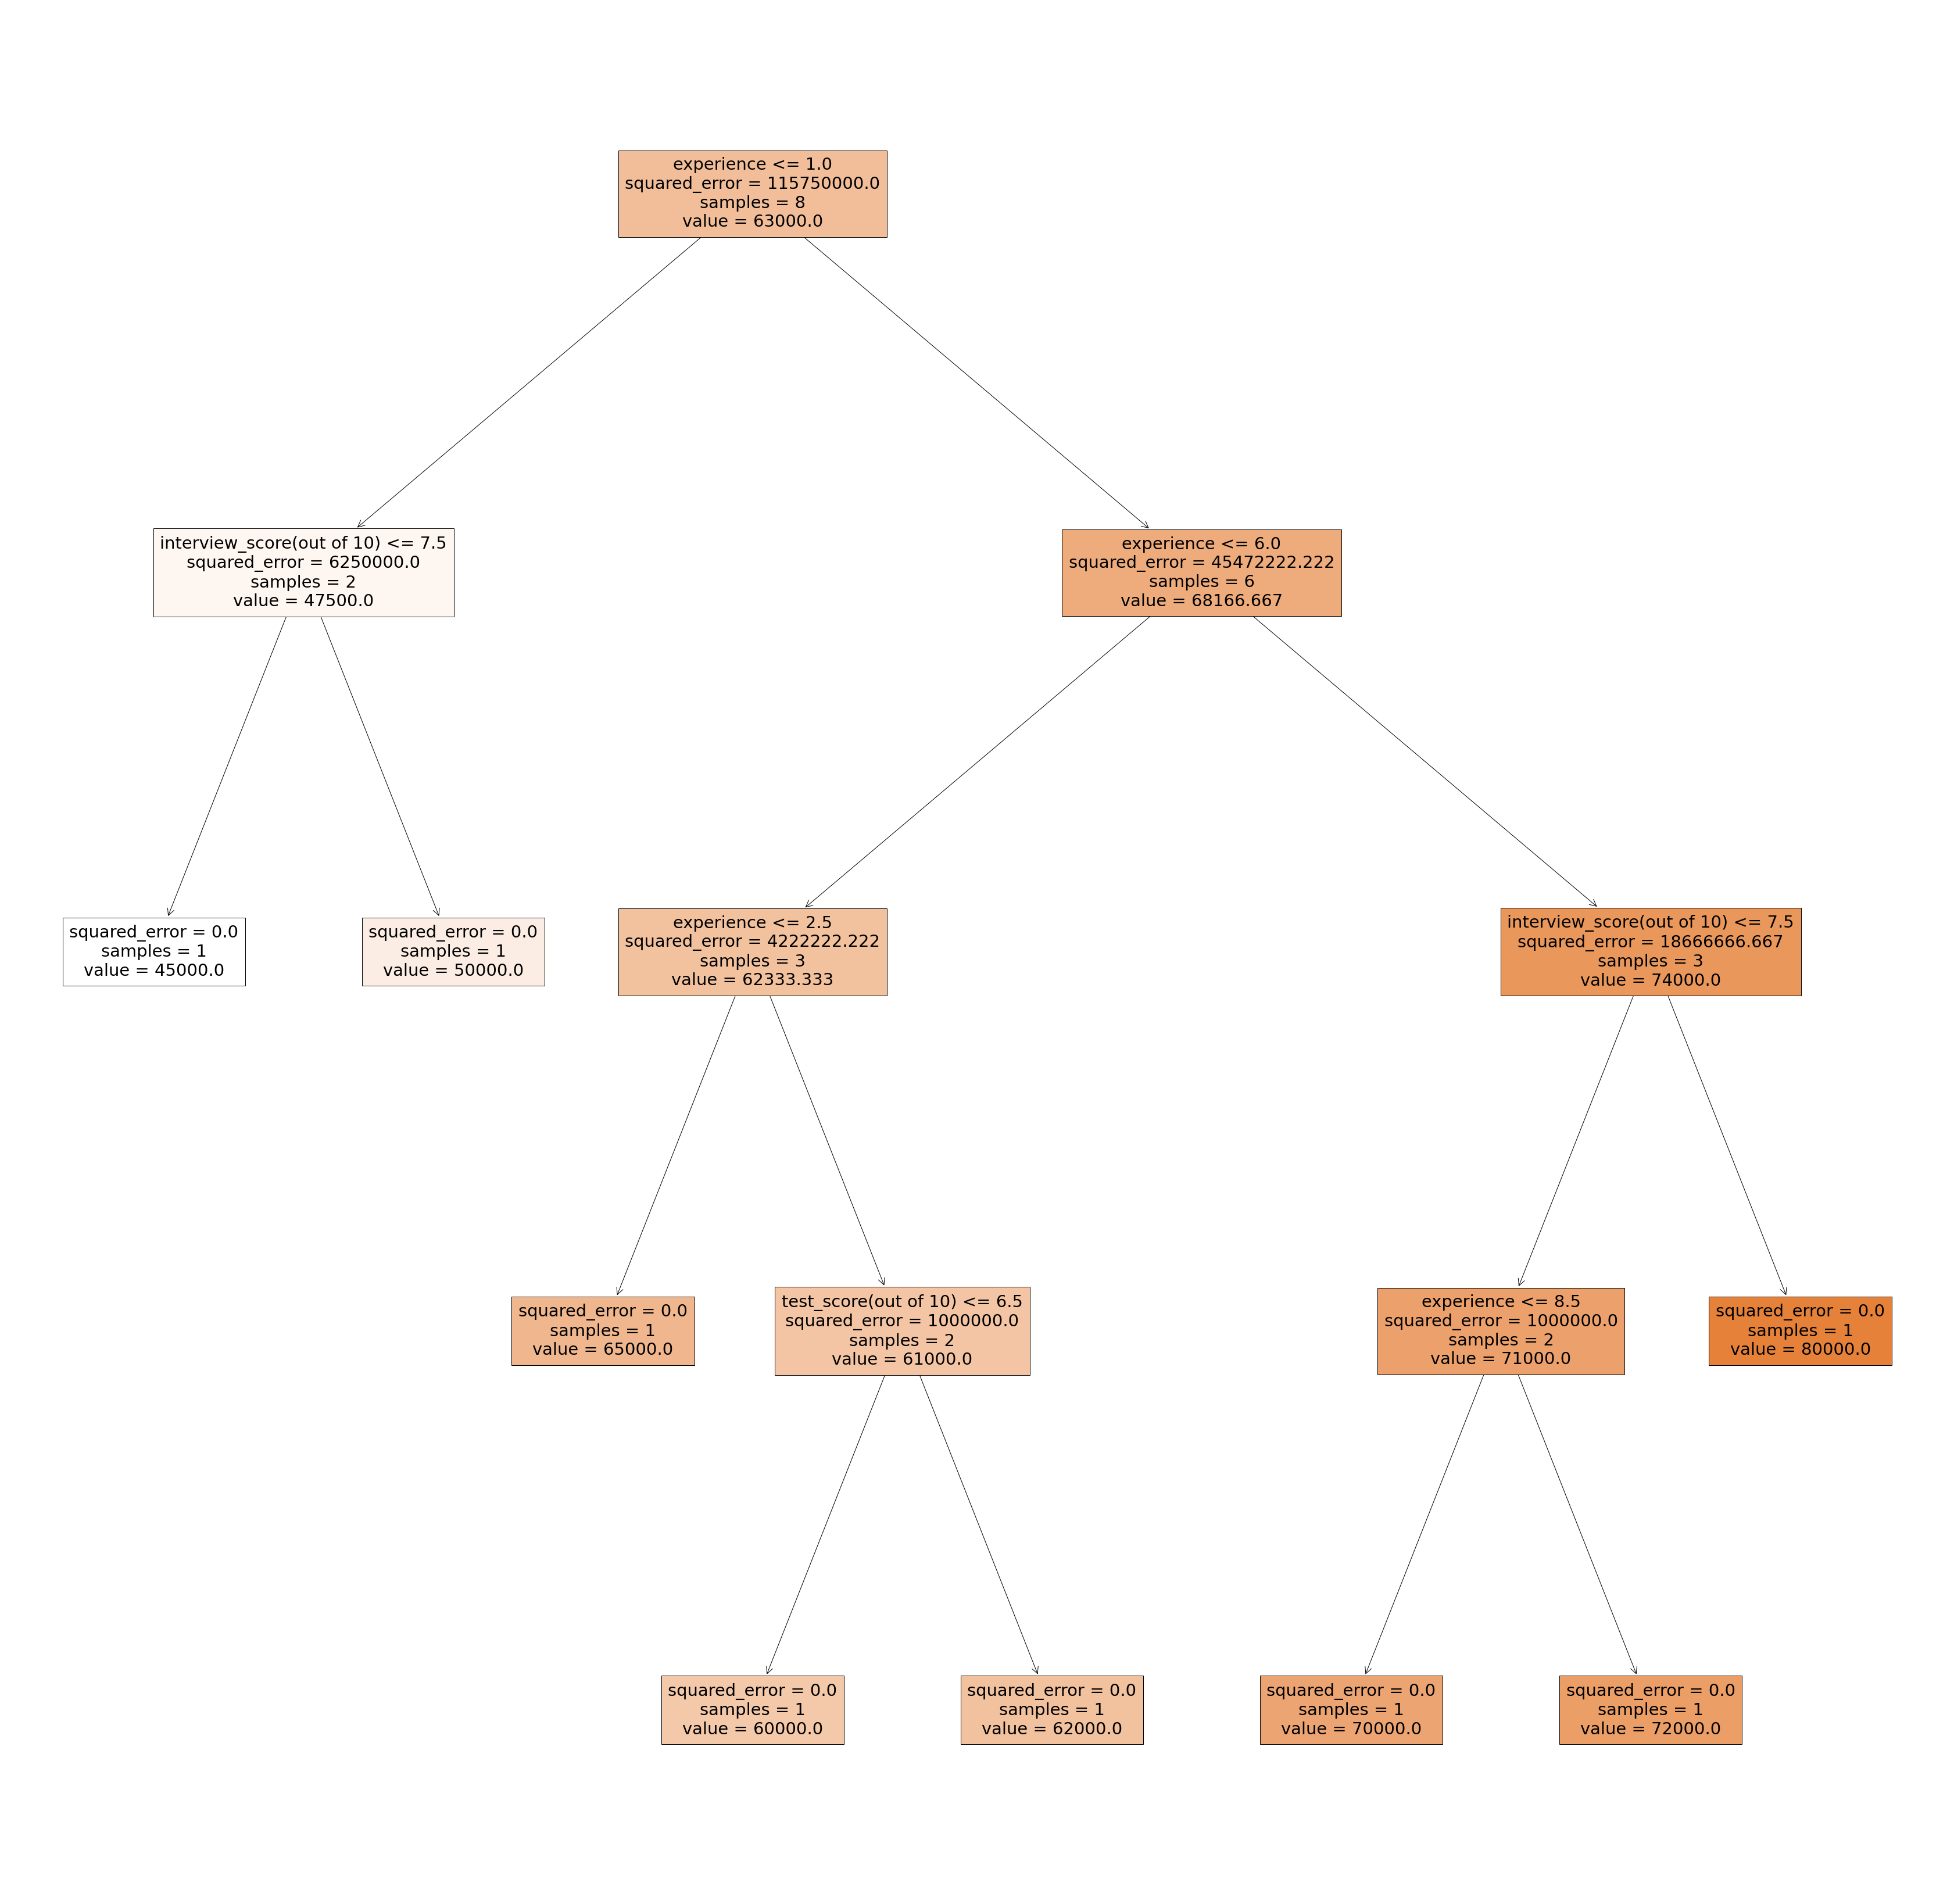

In [35]:
fig=plt.figure(figsize=(60,60))
tree.plot_tree(model,feature_names=feature,
               class_names="salary($)",filled=True)
plt.show()